In [70]:
# Q-8: We can use collision locations to estimate the areas of the zip code regions. 
# * (Assumption) Represent each as an ellipse with semi-axes given by a single standard deviation of the longitude and latitude. 
# * For collisions in 2017, estimate the number of collisions per square kilometer of each zip code region. Considering zipcodes with at least 1000 collisions, report the greatest value for collisions per square kilometer. 
# * Note: Some entries may have invalid or incorrect (latitude, longitude) coordinates. Drop any values that are invalid or seem unreasonable for New York City.

In [71]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [72]:
def dataFram3NYC(FILE_NAME = 'NYPD_Motor_Vehicle_Collisions.csv', use_parent_dir = False):
    """
    READS ~1,5 MILLION ROW CSV FILE, RETURNS MASTER DATAFRAME
    use_parent_dir will use parent directory as base directory
    """
    if use_parent_dir == True:
        CURRENTWRK_DIR = os.getcwd()
        BASE_DIR = os.path.dirname(CURRENTWRK_DIR)
    elif use_parent_dir == False:
        BASE_DIR = os.getcwd()
        
#     STATIC_FOLDER = os.path.dirname(BASE_DIR)
    STATIC_FOLDER = ''
    # FILE_NAME = 'NYPD_Motor_Vehicle_Collisions.csv'
    PATH_COMPILED = os.path.join( BASE_DIR, STATIC_FOLDER, FILE_NAME)
    print('\n> > > > dataFrameNYC() now reading csv with file path below')
    print(PATH_COMPILED)
    print()
    _df = pd.read_csv(PATH_COMPILED, encoding = "iso-8859-1", low_memory = False)
    col_list = list(_df.columns)
    col_ind3x = np.arange(len(col_list))
    col_dict = dict(zip( col_ind3x, col_list))
    print(col_dict)
    return _df

In [73]:
def focusDataframer(columns2keep_list = [0,3,4,5]):
    """
    MODIFIED DATA FRAMER, PRINTS OUT ALL COLUMN INDEX/NAMES, 
    REQUIRES A LIST OF REQUESTED COLUMN INDEXES AS INTEGERS
    RETURNS A DATAFRAME WITH ONLY USER-SELECTED COLUMNS
    """
    pass
    raw_df = dataFram3NYC(use_parent_dir=True)
    col_list = list(raw_df.columns)
    col_ind3x = np.arange(len(col_list))
    col_dict = dict(zip( col_ind3x, col_list))
    col_final = []
    for index in columns2keep_list:
        add_this_column = col_dict[index]
        col_final.append(add_this_column)
    col_final = [
        str(index)
        for index in col_final
    ]
    _df = raw_df[
        col_final
    ]
    print()
    print('> > > focusDataframer(columns2keep_list = [indexNo_as_int00, indexNo_as_int01]')
    print('> > >                * selected columns:')
    for selected_col,keepthis in zip(columns2keep_list,col_final):
        print('> > >                                  ', selected_col,' keeps ', keepthis)
    return _df

In [74]:
focusDataframer()


> > > > dataFrameNYC() now reading csv with file path below
C:\Users\DENVER\Desktop\interviewPY\INT_03_PYTHON_PANDAS_NYC_COLLISION\NYPD_Motor_Vehicle_Collisions.csv

{0: 'DATE', 1: 'TIME', 2: 'BOROUGH', 3: 'ZIP CODE', 4: 'LATITUDE', 5: 'LONGITUDE', 6: 'LOCATION', 7: 'ON STREET NAME', 8: 'CROSS STREET NAME', 9: 'OFF STREET NAME', 10: 'NUMBER OF PERSONS INJURED', 11: 'NUMBER OF PERSONS KILLED', 12: 'NUMBER OF PEDESTRIANS INJURED', 13: 'NUMBER OF PEDESTRIANS KILLED', 14: 'NUMBER OF CYCLIST INJURED', 15: 'NUMBER OF CYCLIST KILLED', 16: 'NUMBER OF MOTORIST INJURED', 17: 'NUMBER OF MOTORIST KILLED', 18: 'CONTRIBUTING FACTOR VEHICLE 1', 19: 'CONTRIBUTING FACTOR VEHICLE 2', 20: 'CONTRIBUTING FACTOR VEHICLE 3', 21: 'CONTRIBUTING FACTOR VEHICLE 4', 22: 'CONTRIBUTING FACTOR VEHICLE 5', 23: 'UNIQUE KEY', 24: 'VEHICLE TYPE CODE 1', 25: 'VEHICLE TYPE CODE 2', 26: 'VEHICLE TYPE CODE 3', 27: 'VEHICLE TYPE CODE 4', 28: 'VEHICLE TYPE CODE 5'}

> > > focusDataframer(columns2keep_list = [indexNo_as_int00

,DATE,ZIP CODE,LATITUDE,LONGITUDE
0,04/30/2019,11222,40.727184,-73.950700
1,04/30/2019,10075,40.776318,-73.962135
2,04/30/2019,11354,40.763283,-73.830710
3,04/30/2019,11412,40.705240,-73.775080
4,04/30/2019,NaN,40.593525,-73.996280
5,04/30/2019,NaN,40.744240,-73.847170
6,04/30/2019,NaN,40.732243,-73.870130
7,04/30/2019,NaN,40.897110,-73.880080
8,04/30/2019,10013,40.721350,-74.004650
9,04/30/2019,11427,40.729880,-73.744320


In [75]:
# focusDataframer()
def dateFilterMyDataFrame(focus_df = focusDataframer(), bring_all_records_for = '2016'):
    """
    REQUIRES A DATAFRAME WITH A TARGET FIELD NAMED 'DATE',
    FILTERS DATE BY FOUR DIGIT YEAR 'YYYY' STRING INPUT
    """
    pass
    print('> > > dateFilterMyDataFrame() filtering all records by year : ' + bring_all_records_for)
#     focus_df = focusDataframer()
    focus_df['dat3'] = [
        date[-4:] for date in focus_df['DATE']
    ]
    filtered_by_date_df = focus_df.loc[focus_df['dat3'] == bring_all_records_for]
    return filtered_by_date_df.drop(columns = 'DATE')


> > > > dataFrameNYC() now reading csv with file path below
C:\Users\DENVER\Desktop\interviewPY\INT_03_PYTHON_PANDAS_NYC_COLLISION\NYPD_Motor_Vehicle_Collisions.csv

{0: 'DATE', 1: 'TIME', 2: 'BOROUGH', 3: 'ZIP CODE', 4: 'LATITUDE', 5: 'LONGITUDE', 6: 'LOCATION', 7: 'ON STREET NAME', 8: 'CROSS STREET NAME', 9: 'OFF STREET NAME', 10: 'NUMBER OF PERSONS INJURED', 11: 'NUMBER OF PERSONS KILLED', 12: 'NUMBER OF PEDESTRIANS INJURED', 13: 'NUMBER OF PEDESTRIANS KILLED', 14: 'NUMBER OF CYCLIST INJURED', 15: 'NUMBER OF CYCLIST KILLED', 16: 'NUMBER OF MOTORIST INJURED', 17: 'NUMBER OF MOTORIST KILLED', 18: 'CONTRIBUTING FACTOR VEHICLE 1', 19: 'CONTRIBUTING FACTOR VEHICLE 2', 20: 'CONTRIBUTING FACTOR VEHICLE 3', 21: 'CONTRIBUTING FACTOR VEHICLE 4', 22: 'CONTRIBUTING FACTOR VEHICLE 5', 23: 'UNIQUE KEY', 24: 'VEHICLE TYPE CODE 1', 25: 'VEHICLE TYPE CODE 2', 26: 'VEHICLE TYPE CODE 3', 27: 'VEHICLE TYPE CODE 4', 28: 'VEHICLE TYPE CODE 5'}

> > > focusDataframer(columns2keep_list = [indexNo_as_int00

In [76]:
def getRidOfZerosFromLatLon(yearFiltered_df = dateFilterMyDataFrame(focus_df = focusDataframer(), bring_all_records_for = '2017')):
    """
    REMOVES RECORDS WITH ZERO IN EITHER LATITUDE OR LONGITUDE FROM DATAFRAME
    SINCE NEITHER LAT-ZERO NOR LON-ZERO IS IN NYC
    """
    yf_df = yearFiltered_df.copy()
    yfd_df = yf_df.dropna().loc[:, (yf_df == 0).any()]
    yfd_df['zipCod3'] = [
        yf_df['ZIP CODE'][ind3x]
        for ind3x in list(yfd_df.index)
    ]
    return yfd_df


> > > > dataFrameNYC() now reading csv with file path below
C:\Users\DENVER\Desktop\interviewPY\INT_03_PYTHON_PANDAS_NYC_COLLISION\NYPD_Motor_Vehicle_Collisions.csv

{0: 'DATE', 1: 'TIME', 2: 'BOROUGH', 3: 'ZIP CODE', 4: 'LATITUDE', 5: 'LONGITUDE', 6: 'LOCATION', 7: 'ON STREET NAME', 8: 'CROSS STREET NAME', 9: 'OFF STREET NAME', 10: 'NUMBER OF PERSONS INJURED', 11: 'NUMBER OF PERSONS KILLED', 12: 'NUMBER OF PEDESTRIANS INJURED', 13: 'NUMBER OF PEDESTRIANS KILLED', 14: 'NUMBER OF CYCLIST INJURED', 15: 'NUMBER OF CYCLIST KILLED', 16: 'NUMBER OF MOTORIST INJURED', 17: 'NUMBER OF MOTORIST KILLED', 18: 'CONTRIBUTING FACTOR VEHICLE 1', 19: 'CONTRIBUTING FACTOR VEHICLE 2', 20: 'CONTRIBUTING FACTOR VEHICLE 3', 21: 'CONTRIBUTING FACTOR VEHICLE 4', 22: 'CONTRIBUTING FACTOR VEHICLE 5', 23: 'UNIQUE KEY', 24: 'VEHICLE TYPE CODE 1', 25: 'VEHICLE TYPE CODE 2', 26: 'VEHICLE TYPE CODE 3', 27: 'VEHICLE TYPE CODE 4', 28: 'VEHICLE TYPE CODE 5'}

> > > focusDataframer(columns2keep_list = [indexNo_as_int00

In [77]:
def zipCodevsColSqKm_df(yearFilteredDroppedGrouped_df = getRidOfZerosFromLatLon()):
    """"""
    yfdgCount_df = yearFilteredDroppedGrouped_df.groupby('zipCod3').count()  #YearFiltered_Dropped_GROUPED_DF
    yfdgCount_df['collusionCount'] = yfdgCount_df['LATITUDE']
    yfdgCount_df1 = yfdgCount_df.drop(columns=['LATITUDE','LONGITUDE'])
    yfdgCount_df2 = yfdgCount_df1.sort_values('collusionCount', ascending = False)
    zipCollusion_df = yfdgCount_df2.loc[yfdgCount_df2['collusionCount'] > 1000]
    return zipCollusion_df

In [78]:
def standardDeviationZIPLatLan(yearFiltered_df = dateFilterMyDataFrame(focus_df = focusDataframer(), bring_all_records_for = '2017')):
#     dropZeroLat_df = yearFiltered_df.loc[yearFiltered_df['LATITUDE'] == 0]
    print(yearFiltered_df.describe())
#     print(dropZeroLat_df.describe())
    print('> > > standardDeviationZIPLatLan() calculated std of LAT and LAN: ')
    return yearFiltered_df.groupby('ZIP CODE').std()


> > > > dataFrameNYC() now reading csv with file path below
C:\Users\DENVER\Desktop\interviewPY\INT_03_PYTHON_PANDAS_NYC_COLLISION\NYPD_Motor_Vehicle_Collisions.csv

{0: 'DATE', 1: 'TIME', 2: 'BOROUGH', 3: 'ZIP CODE', 4: 'LATITUDE', 5: 'LONGITUDE', 6: 'LOCATION', 7: 'ON STREET NAME', 8: 'CROSS STREET NAME', 9: 'OFF STREET NAME', 10: 'NUMBER OF PERSONS INJURED', 11: 'NUMBER OF PERSONS KILLED', 12: 'NUMBER OF PEDESTRIANS INJURED', 13: 'NUMBER OF PEDESTRIANS KILLED', 14: 'NUMBER OF CYCLIST INJURED', 15: 'NUMBER OF CYCLIST KILLED', 16: 'NUMBER OF MOTORIST INJURED', 17: 'NUMBER OF MOTORIST KILLED', 18: 'CONTRIBUTING FACTOR VEHICLE 1', 19: 'CONTRIBUTING FACTOR VEHICLE 2', 20: 'CONTRIBUTING FACTOR VEHICLE 3', 21: 'CONTRIBUTING FACTOR VEHICLE 4', 22: 'CONTRIBUTING FACTOR VEHICLE 5', 23: 'UNIQUE KEY', 24: 'VEHICLE TYPE CODE 1', 25: 'VEHICLE TYPE CODE 2', 26: 'VEHICLE TYPE CODE 3', 27: 'VEHICLE TYPE CODE 4', 28: 'VEHICLE TYPE CODE 5'}

> > > focusDataframer(columns2keep_list = [indexNo_as_int00

In [79]:
def zipCodeAreaSqKm(yearFilteredDroppedGrouped_df= standardDeviationZIPLatLan()):
    yfdg_df = yearFilteredDroppedGrouped_df.copy() 
      #YearFiltered_Dropped_GROUPED_DF
    PI = 3.14
    yfdg_df['are4'] = [
        float(PI/4*a *69*b*55)  for a,b in zip(yfdg_df['LATITUDE'], yfdg_df['LONGITUDE'])
    ]

    final_df = yfdg_df.drop(columns=['LATITUDE', 'LONGITUDE'])
    # .loc[yfdg_df['are4'] >= 1000]
    calculatedTotalArea = final_df.sort_values(by='are4', ascending=False).sum() #752,000 km2
    nyc_totalArea = 783800
    realization_factor = calculatedTotalArea/nyc_totalArea
    print('> > > zipCodevsColSqKm_df calculated estimated area as 752 thousand km2')
    print('> > >                   NYC total area actually is 783 thousand 800 km2')
    print('> > >                   realization factor has been used to adjust nominal to real values')
    print('> > >                   ',realization_factor)
    final_df['ar3a'] = [
        float(area*realization_factor)
        for area in final_df['are4']
    ]
    zipArea_df = final_df.drop(columns='are4').T
    return zipArea_df

            LATITUDE      LONGITUDE
count  217075.000000  217075.000000
mean       40.707421     -73.919369
std         0.842007       2.536927
min         0.000000    -201.237060
25%        40.667934     -73.976000
50%        40.722286     -73.927284
75%        40.771656     -73.865405
max        41.126150       0.000000
> > > standardDeviationZIPLatLan() calculated std of LAT and LAN: 


In [80]:
zipCodeAreaSqKm()

> > > zipCodevsColSqKm_df calculated estimated area as 752 thousand km2
> > >                   NYC total area actually is 783 thousand 800 km2
> > >                   realization factor has been used to adjust nominal to real values
> > >                    are4    0.95984
dtype: float64


ZIP CODE,10000,10001,10002,10003,10004,10005,10006,10007,10009,10010,...,11433,11434,11435,11436,11691,11692,11693,11694,11695,11697
ar3a,0.099923,5203.415217,16032.158381,0.06347,0.009657,0.006329,0.004672,0.01667,0.038742,0.032842,...,0.090984,5511.003164,0.166922,0.086354,10404.852574,0.035078,0.153376,0.165709,NaN,4.079931


In [95]:
def zipCodeColPerSqKm(zipCollusion_df= zipCodevsColSqKm_df(), zipArea_df=zipCodeAreaSqKm()):
    """
    RETURNS ZIP CODE VS COLLUSION-PER-SQ-KM2 STORED IN A DATAFRAME
    """
    zipCollusion_df['AR3A'] = [
        zipArea_df[zipCode][0] for zipCode in list(zipCollusion_df.index)
    ]
    # zipArea_df 
    zipCollusion_df['colPerSqKm'] = [
        collusion/area
        for collusion, area in zip(zipCollusion_df['collusionCount'], zipCollusion_df['AR3A'])
    ]
    zipColSqKm_df= zipCollusion_df.sort_values(by='colPerSqKm', ascending=False)[[
        'colPerSqKm'
    ]]
    return zipColSqKm_df

> > > zipCodevsColSqKm_df calculated estimated area as 752 thousand km2
> > >                   NYC total area actually is 783 thousand 800 km2
> > >                   realization factor has been used to adjust nominal to real values
> > >                    are4    0.95984
dtype: float64


In [100]:
def answerQ8WithPrompt(zipColSqKm_df = zipCodeColPerSqKm()):
    z1p = zipColSqKm_df['colPerSqKm'].index[0]
    colMax = zipColSqKm_df['colPerSqKm'][0]
    print('> > > q8finalAnswer() for highest collusion per area density is {:,.0f} col/sq-km'.format(colMax))
    print('> > > > > > > > > > > while ZIP code with highest density above is ' + z1p)
    return None

In [101]:
answerQ8WithPrompt()

> > > q8finalAnswer() for highest collusion per area density is 52,780 col/sq-km
> > > > > > > > > > > while ZIP code with highest density above is 10022


In [103]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [125]:
def bubbleZipCodeVsColPerSqKm(zipColSqKm_df = zipCodeColPerSqKm(), bubbleCount = 10):
    """
    PLOTS A BUBBLE CHART WITH BUBBLE SIZE PROPORTIONATE TO COLLUSION COUNT PER ZIP CODE
    """
    z1p_list = zipColSqKm_df['colPerSqKm'].index[:bubbleCount]
    colMax_list = zipColSqKm_df['colPerSqKm'][:bubbleCount]
    plt.figure(figsize=(22, 15))
    plt.title('BUBBLE CHART: ZIP CODE VS COLLUSION-PER-SQ-KM-2017')
    plt.ylabel('Collusion Per Sq-Km for 2017')
    plt.xlabel('ZIP Code (NYPD collusion dataset)')
    plt.xticks(rotation=45)
    for ZIPCODE,COLSQKM in zip(z1p_list,colMax_list):
        plt.scatter(ZIPCODE,COLSQKM, s=5000*COLSQKM/colMax_list.max(), marker='o', edgecolors='black' , alpha = 0.50,label = str(ZIPCODE))
    plt.legend(loc='best')
    plt.show()

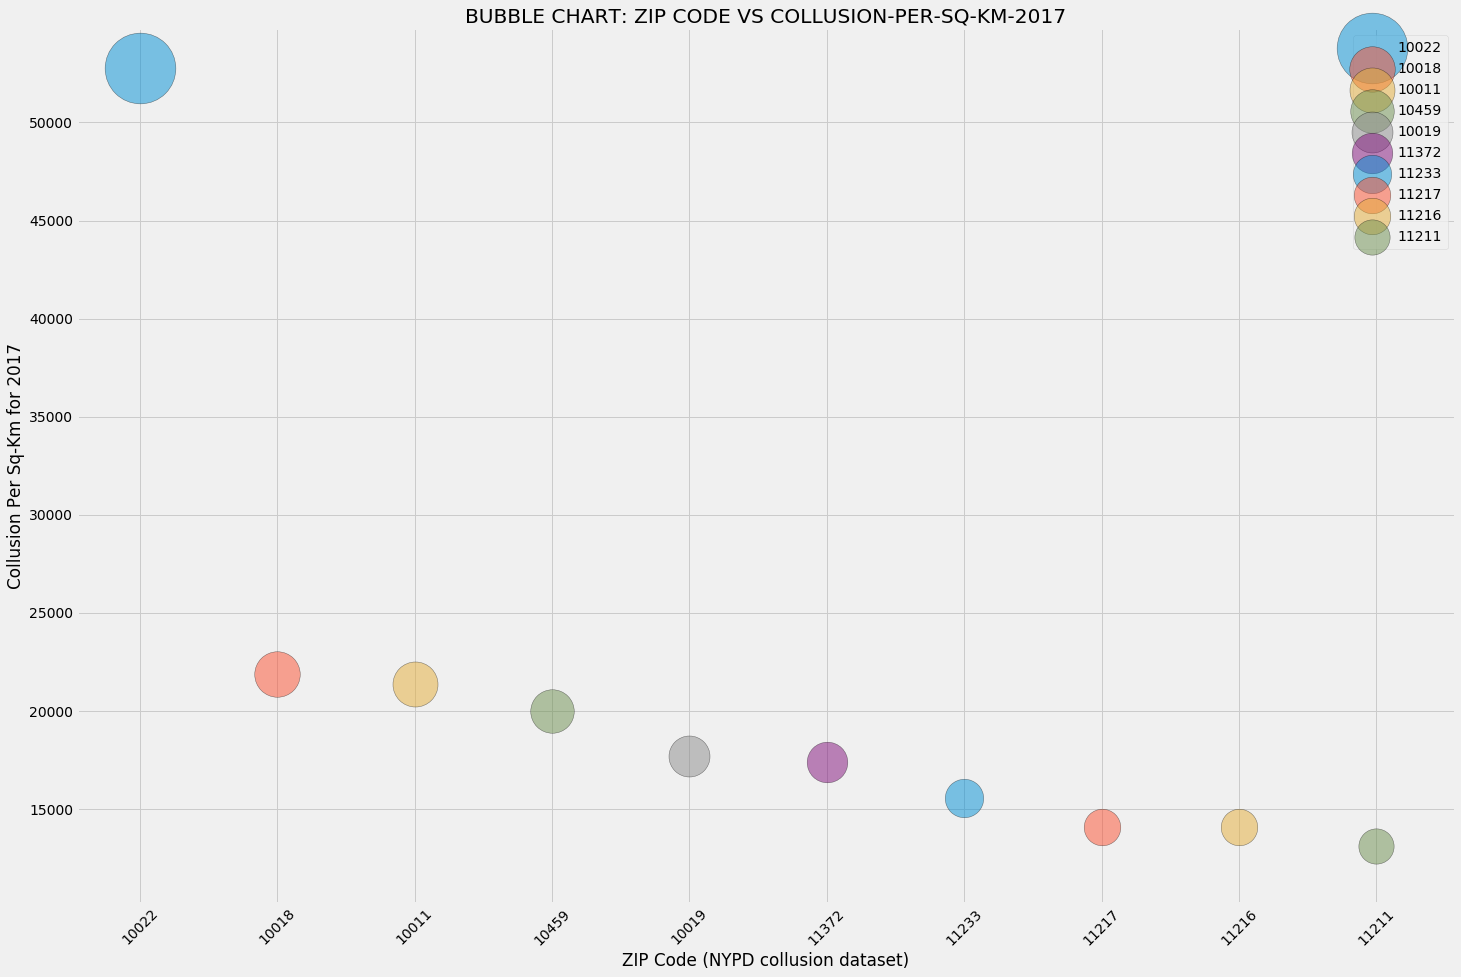

In [126]:
bubbleZipCodeVsColPerSqKm()